In [32]:
import warnings
warnings.filterwarnings(action="ignore")

In [33]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [34]:
df=pd.read_csv("gd_data.csv")
df

,x,y
0,24.0,21.549452
1,50.0,47.464463
2,15.0,17.218656
3,38.0,36.586398
4,87.0,87.288984
...,...,...
695,58.0,58.595006
696,93.0,94.625094
697,82.0,88.603770
698,66.0,63.648685


In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x       700 non-null    float64
 1   y       699 non-null    float64
dtypes: float64(2)
memory usage: 11.1 KB


In [13]:
df.shape

(700, 2)

In [14]:
df.corr()

,x,y
x,1.00000,0.99534
y,0.99534,1.00000


#Scaling

In [23]:
df=(df-df.mean())/df.std()

In [24]:
df=pd.read_csv(r'gd_data.csv',nrows=200).rename(columns={"x":"Area",'y':"Price"})

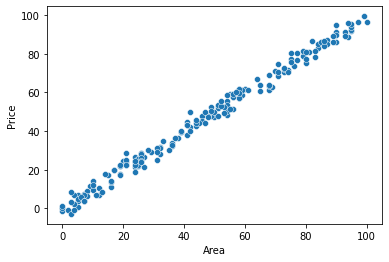

In [25]:
sns.scatterplot(x=df["Area"],y=df["Price"])

In [26]:
X=np.array(df["Area"])
y=np.array(df["Price"])

In [27]:
def gradient(X,y,m_current=0,c_current=0,lr=0.001,iters=1000):
    N=float(len(y))
    
    gd_df=pd.DataFrame(columns=["m","c","cost"])
    
    for i in range(iters):
        
        y_pred=m_current*X+c_current

        cost=sum([k**2 for k in y-y_pred])/N

        m_gradient=(-2/N)*sum((y-y_pred)*X) #dj/dm

        c_gradient=(-2/N)*sum(y-y_pred) #dj/dc

        m_current=m_current-lr*m_gradient

        c_current=c_current-lr*c_gradient
        
        gd_df.loc[i]=[m_current,c_current,cost]
        
    return gd_df   


In [28]:
%%time
gd_df=gradient(X,y)

CPU times: user 1.85 s, sys: 88.4 ms, total: 1.94 s
Wall time: 1.86 s


In [29]:
gd_df

,m,c,cost
0,5.617521,0.089974,2.801608e+03
1,-20.498383,-0.328281,6.039143e+04
2,100.914678,1.616223,1.305096e+06
3,-463.535670,-7.423759,2.820725e+07
4,2160.598764,34.603229,6.096511e+08
...,...,...,...
995,NaN,NaN,NaN
996,NaN,NaN,NaN
997,NaN,NaN,NaN
998,NaN,NaN,NaN


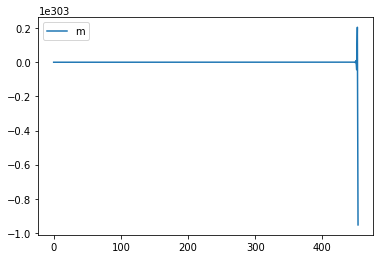

In [36]:
gd_df.plot.line(y=["m"])

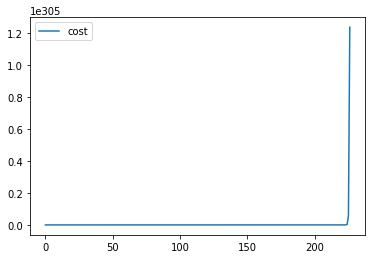

In [37]:
gd_df.plot.line(y=["cost"])